In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [4]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170624.txt')

In [30]:
df.head()

#df.STATION.unique()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513


Manhattan: 1. 'TIMES SQ-42 ST', 2. 'CHAMBERS ST' 3. '59 ST COLUMBUS'
Queens: 1. 'FLUSHING-MAIN', 2. '74 ST-BROADWAY'
Brooklyn: 1. 'ATL AV-BARCLAY', 2. 'CONEY IS-STILLW'



##Question 1##

In [23]:
"""
df_dict={}
for x in range(len(df)):
    currentid = tuple(df.iloc[x,0:4])
    currentvalue = df.iloc[x,4:11]
    df_dict.setdefault(currentid, [])
    df_dict[currentid].append(currentvalue)
"""









{}


In [5]:
####Question 3####

station_date=df.groupby(['C/A','UNIT','SCP','STATION','DATE'])

In [6]:
entry_date_count=station_date.ENTRIES.apply(lambda x: x.max() - x.min())
entry_date_count

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          06/17/2017     732
                                      06/18/2017     579
                                      06/19/2017    1204
                                      06/20/2017    1348
                                      06/21/2017    1250
                                      06/22/2017    1164
                                      06/23/2017    1316
             02-00-01  59 ST          06/17/2017     670
                                      06/18/2017     509
                                      06/19/2017     970
                                      06/20/2017    1091
                                      06/21/2017    1110
                                                    ... 
TRAM2  R469  00-05-00  RIT-ROOSEVELT  06/19/2017       1
                                      06/20/2017       1
                                      06/21/2017       1
                                      0

In [7]:
entry_date_count=entry_date_count.reset_index()
entry_date_count

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/17/2017,732
1,A002,R051,02-00-00,59 ST,06/18/2017,579
2,A002,R051,02-00-00,59 ST,06/19/2017,1204
3,A002,R051,02-00-00,59 ST,06/20/2017,1348
4,A002,R051,02-00-00,59 ST,06/21/2017,1250
5,A002,R051,02-00-00,59 ST,06/22/2017,1164
6,A002,R051,02-00-00,59 ST,06/23/2017,1316
7,A002,R051,02-00-01,59 ST,06/17/2017,670
8,A002,R051,02-00-01,59 ST,06/18/2017,509
9,A002,R051,02-00-01,59 ST,06/19/2017,970


In [92]:
entry_date_count.iloc[0,4]


'06/17/2017'

In [94]:
#change the date to datetime object
#type(dateutil.parser.parse(date_00[0]))
dates=[]
for i in range(0,len(entry_date_count)):
    dates.append(dateutil.parser.parse(entry_date_count.iloc[i,4]))
entry_date_count['DATE_NEW']=dates
entry_date_count

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DATE_NEW
0,A002,R051,02-00-00,59 ST,06/17/2017,732,2017-06-17
1,A002,R051,02-00-00,59 ST,06/18/2017,579,2017-06-18
2,A002,R051,02-00-00,59 ST,06/19/2017,1204,2017-06-19
3,A002,R051,02-00-00,59 ST,06/20/2017,1348,2017-06-20
4,A002,R051,02-00-00,59 ST,06/21/2017,1250,2017-06-21
5,A002,R051,02-00-00,59 ST,06/22/2017,1164,2017-06-22
6,A002,R051,02-00-00,59 ST,06/23/2017,1316,2017-06-23
7,A002,R051,02-00-01,59 ST,06/17/2017,670,2017-06-17
8,A002,R051,02-00-01,59 ST,06/18/2017,509,2017-06-18
9,A002,R051,02-00-01,59 ST,06/19/2017,970,2017-06-19


In [95]:
###Question 4###
import matplotlib.pyplot as plt
import dateutil.parser

date_00=entry_date_count.iloc[0:7, 6]
counts_00=entry_date_count.iloc[0:7, 5]


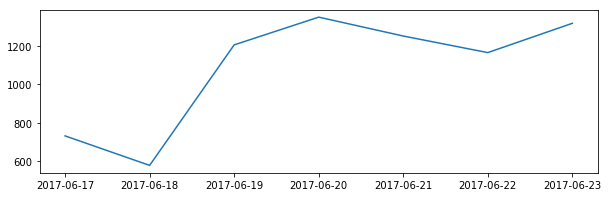

In [96]:
plt.figure(figsize=(10,3))
plt.plot(date_00,counts_00)

In [12]:

station_entry_week_count=entry_date_count.groupby(['C/A','UNIT','STATION']).ENTRIES.agg(['sum'])
station_entry_week_count

,,,sum
C/A,UNIT,STATION,
A002,R051,59 ST,74433
A006,R079,5 AV/59 ST,2437519
A007,R079,5 AV/59 ST,32538
A010,R080,57 ST-7 AV,103464
A011,R080,57 ST-7 AV,80238
A013,R081,49 ST,30165
A014,R081,49 ST,20397
A015,R081,49 ST,57939
A016,R081,49 ST,27685
